In [1]:
import pandas as pd
import unicodedata #permet d'enlever les accents
import re #Pour utiliser des expressions régulières
import math #
import matplotlib.pyplot as plt #Pour la visualisation
import seaborn as sns

# 1. Chargement des données et nettoyage

### Importation des données des cinq fichiers

In [7]:
type_df = pd.read_excel('data_tp/type.xlsx')
caracteristiques_df = pd.read_excel('data_tp/caracteristiques.xlsx')
etablissements_df = pd.read_excel('data_tp/etablissements.xlsx')
territoires_df = pd.read_excel('data_tp/territoires.xlsx')
adresses_df = pd.read_excel('data_tp/adresses.xlsx')

### Analyse de caracteristiques_df

In [10]:
# Vérification des valeurs manquantes
missing_values_type_df = type_df.isnull().sum()
print("Nombre de valeurs manquantes par colonne pour types_df:")
print(missing_values_type_df)
caracteristiques_df

Nombre de valeurs manquantes par colonne pour types_df:
ETBL_ID                 0
ETBL_TYPE_GENRE         0
ETBL_TYPE_ID         1370
ETBL_TYPE_FR         1370
ETBL_TYPE_EN         1370
ETBL_TYPE_GRP_ID     9380
ETBL_TYPE_GRP_FR     9380
ETBL_TYPE_GRP_EN     9380
ETBL_TYPE_CATG_ID       0
ETBL_TYPE_CATG_FR       0
ETBL_TYPE_CATG_EN       0
dtype: int64


,ETBL_ID,CARACT_ID,CARACT_NOM_FR,CARACT_NOM_EN,CARACT_ATTRB_ID,CARACT_ATTRB_NOM_FR,CARACT_ATTRB_NOM_EN,CARACT_ATTRB_VAL
0,838721,10581,Activités,Activities,20143552.0,Golf à moins de 10 km,Golf within10 km,NaN
1,838721,10581,Activités,Activities,20143561.0,Ski de fond à moins de 10 km,Cross-country skiing within 10 km,NaN
2,838721,10581,Activités,Activities,20143568.0,Théâtre d'été à moins de 10 km,Summer theatre within 10 km,NaN
3,838721,10581,Activités,Activities,10667.0,Vélo,Cycling,NaN
4,838721,10579,Services,Services,364299662.0,Accès Internet : sans fil gratuit,Internet access : free wireless,NaN
...,...,...,...,...,...,...,...,...
341316,500016738,14372,Équipement des unités,Amenities,433306.0,Unité pour non-fumeur,Non-smoking units,1.0
341317,500016738,16957126,Unités,Units,16957153.0,"appartement~, chalet~ ou maison~","apartment~, cottage~ or house~",1.0
341318,500016738,10497,Classification,Rating,18336.0,En cours d'évaluation,Rating in progress,NaN
341319,500016738,420859,Tarifs,Rates,18252.0,Maximum pour l'unité la moins chère,Maximum for the least expensive unit,435.0


### Analyse de etablissements_df 

In [13]:
missing_values_etablissements_df = etablissements_df.isnull().sum()
print("Nombre de valeurs manquantes par colonne pour etablissements_df:")
print(missing_values_etablissements_df)
# Récupération des types uniques dans la colonne ETBL_DESC_FR sans NaN
types_uniques = etablissements_df['ETBL_DESC_FR'].dropna().apply(type).unique()
print('Les types uniques dans la colonne ETBL_DESC_FR : ')
print(types_uniques)

Nombre de valeurs manquantes par colonne pour etablissements_df:
ETBL_ID               0
ETBL_NOM_FR           0
ETBL_NOM_EN           0
ETBL_DESC_FR       4536
ETBL_DESC_EN       4544
ETBL_RESERVABLE       0
dtype: int64
Les types uniques dans la colonne ETBL_DESC_FR : 
[<class 'str'>]


#### Les colonnes ETBL_DESC_FR et ETBL_DESC_EN contiennent des chaînes de caractères, donc je remplace les NaN par des chaînes vides.

In [16]:
etablissements_df.columns

etablissements_df['ETBL_DESC_FR'] = etablissements_df['ETBL_DESC_FR'].fillna('')  # Remplacer par une chaîne vide
etablissements_df['ETBL_DESC_EN'] = etablissements_df['ETBL_DESC_EN'].fillna('')

### Analyse de territoires_df

In [19]:
territoires_df

,ETBL_ID,TERR_GENRE,TERR_ZONE_ID,TERR_ZONE_NOM_FR,TERR_ZONE_NOM_EN,TERR_ZONE_GENRE_ID,TERR_ZONE_GENRE_FR,TERR_ZONE_GENRE_EN
0,838721,principal,292120028,Le mont Royal,The Mont Royal,432971,Quartier / secteur,District / Area
1,838721,principal,21950,Montréal,Montréal,91,Ville,City
2,838721,principal,3432,Montréal,Montréal,81,Région,Area
3,838721,principal,3406,Québec,Quebec,75,Province,Province
4,838774,principal,22830,Boileau,Boileau,91,Ville,City
...,...,...,...,...,...,...,...,...
37173,500016737,principal,3430,Laurentides,Laurentides,81,Région,Area
37174,500016737,principal,3406,Québec,Quebec,75,Province,Province
37175,500016738,principal,21384,Saint-Irénée,Saint-Irénée,91,Ville,City
37176,500016738,principal,3414,Charlevoix,Charlevoix,81,Région,Area


In [21]:
territoires_df.isnull().sum()

ETBL_ID               0
TERR_GENRE            0
TERR_ZONE_ID          0
TERR_ZONE_NOM_FR      0
TERR_ZONE_NOM_EN      0
TERR_ZONE_GENRE_ID    0
TERR_ZONE_GENRE_FR    0
TERR_ZONE_GENRE_EN    0
dtype: int64

Pas de valeurs NaN dans territoires_df 

# 2. Création trois nouvelles variables

In [25]:
#Fonction pour enlever les accents
def enlever_accents(chaine):
    if isinstance(chaine, str):  # Vérifier si la valeur est une chaîne
        return ''.join(c for c in unicodedata.normalize('NFD', chaine) if unicodedata.category(c) != 'Mn')
    return chaine  # Retourne la valeur inchangée si ce n'est pas une chaîne
    
# Appliquation de la fonction à la colonne ETBL_DESC_FR
etablissements_df['ETBL_DESC_FR'] = etablissements_df['ETBL_DESC_FR'].apply(enlever_accents)

### Ajout des nouvelles colonnes avec les conditions demandées

\b : délimite le mot, assurant que la correspondance se fait sur des mots entiers.

(s)? : capture le "s" optionnel pour inclure les formes pluriel des mots.

In [29]:
# Création de nouvelles colonnes avec des valeurs 0/1 selon la présence des mots
etablissements_df['Soleil'] = etablissements_df['ETBL_DESC_FR'].str.contains(r'\bsoleil(?:s)?\b', case=False).astype(int)
etablissements_df['Foret'] = etablissements_df['ETBL_DESC_FR'].str.contains(r'\bforet(?:s)?\b', case=False).astype(int)
etablissements_df['Mer'] = etablissements_df['ETBL_DESC_FR'].str.contains(r'\bmer(?:s)?\b', case=False).astype(int)
etablissements_df['Hebergement'] = etablissements_df['ETBL_DESC_FR'].str.contains(r'\bhebergement(?:s)?\b', case=False).astype(int)

# 3. Création de genre_zone 

In [32]:
territoires_df

,ETBL_ID,TERR_GENRE,TERR_ZONE_ID,TERR_ZONE_NOM_FR,TERR_ZONE_NOM_EN,TERR_ZONE_GENRE_ID,TERR_ZONE_GENRE_FR,TERR_ZONE_GENRE_EN
0,838721,principal,292120028,Le mont Royal,The Mont Royal,432971,Quartier / secteur,District / Area
1,838721,principal,21950,Montréal,Montréal,91,Ville,City
2,838721,principal,3432,Montréal,Montréal,81,Région,Area
3,838721,principal,3406,Québec,Quebec,75,Province,Province
4,838774,principal,22830,Boileau,Boileau,91,Ville,City
...,...,...,...,...,...,...,...,...
37173,500016737,principal,3430,Laurentides,Laurentides,81,Région,Area
37174,500016737,principal,3406,Québec,Quebec,75,Province,Province
37175,500016738,principal,21384,Saint-Irénée,Saint-Irénée,91,Ville,City
37176,500016738,principal,3414,Charlevoix,Charlevoix,81,Région,Area


In [34]:
def genre_zone(genre):
    # Filtrage des données selon le genre de zone donné en argument
    filtered_df = territoires_df[territoires_df['TERR_ZONE_GENRE_FR'] == genre]
    
    # Calcul et affichage du nombre d'ETBL_ID par zone de territoire
    result = filtered_df.groupby('TERR_ZONE_NOM_FR')['ETBL_ID'].count()
    print(result)


In [36]:
genre_zone('Ville')

TERR_ZONE_NOM_FR
Acton Vale    4
Adstock       7
Aguanish      5
Akulivik      1
Albanel       3
             ..
Westbury      1
Wickham       1
Windsor       3
Wotton        7
Yamachiche    5
Name: ETBL_ID, Length: 918, dtype: int64


In [38]:
genre_zone('Région')

TERR_ZONE_NOM_FR
Abitibi-Témiscamingue       244
Baie-James                   80
Bas-Saint-Laurent           498
Cantons-de-l'Est           1140
Centre-du-Québec            165
Charlevoix                  762
Chaudière-Appalaches        542
Duplessis                   162
Eeyou Istchee                 8
Gaspésie                    748
Lanaudière                  595
Laurentides                1781
Laval                        22
Manicouagan                 213
Mauricie                    487
Montréal                    541
Montérégie                  303
Nunavik                      64
Outaouais                   447
Québec                     1008
Saguenay-Lac-Saint-Jean     581
Îles-de-la-Madeleine        399
Name: ETBL_ID, dtype: int64


# 4.Création du DataFrame

### D'abord je recupere les regions et leurs ETBL_ID dans territoires_filter

In [42]:
mask_region = territoires_df['TERR_ZONE_GENRE_FR'] == 'Région'
result = territoires_df[mask_region]
territoires_filter =result[['TERR_ZONE_NOM_FR', 'ETBL_ID']]
territoires_filter

,TERR_ZONE_NOM_FR,ETBL_ID
2,Montréal,838721
5,Outaouais,838774
9,Montréal,838885
13,Montréal,838963
17,Montréal,839010
...,...,...
37163,Québec,500016734
37166,Saguenay-Lac-Saint-Jean,500016735
37170,Montréal,500016736
37173,Laurentides,500016737


### Ensuite, je recupere les classifications avec CARACT_ATTRB_NOM_FR et ETBL_ID

In [45]:
caracteristiques_mask = caracteristiques_df['CARACT_NOM_FR'] == 'Classification'
result = caracteristiques_df[caracteristiques_mask]
caracteristiques_filtrer = result[['CARACT_ATTRB_NOM_FR', 'ETBL_ID']]
caracteristiques_filtrer

,CARACT_ATTRB_NOM_FR,ETBL_ID
26,2 étoiles,838721
58,2 étoiles,838774
90,3 étoiles,838885
114,3 étoiles,838963
148,1 étoile supérieur,839010
...,...,...
341227,En cours d'évaluation,500016734
341235,En cours d'évaluation,500016735
341259,En cours d'évaluation,500016736
341281,En cours d'évaluation,500016737


### Fusion des DataFrames

In [48]:
merged_df_4 = pd.merge(territoires_filter, caracteristiques_filtrer, on='ETBL_ID', how='left')
# Compter le nombre d'ETBL_ID par région et par type de classification
merged_df_4 = merged_df_4.groupby(['TERR_ZONE_NOM_FR', 'CARACT_ATTRB_NOM_FR']).agg(Nombre_ETBL_ID=('ETBL_ID', 'count')).reset_index()
# Remplacer les NaN par 0
merged_df_4['Nombre_ETBL_ID'] = merged_df_4['Nombre_ETBL_ID'].fillna(0)
merged_df_4

,TERR_ZONE_NOM_FR,CARACT_ATTRB_NOM_FR,Nombre_ETBL_ID
0,Abitibi-Témiscamingue,0 étoile,23
1,Abitibi-Témiscamingue,1 étoile,36
2,Abitibi-Témiscamingue,2 soleils,1
3,Abitibi-Témiscamingue,2 étoiles,84
4,Abitibi-Témiscamingue,3 soleils,5
...,...,...,...
222,Îles-de-la-Madeleine,3 soleils,6
223,Îles-de-la-Madeleine,3 étoiles,205
224,Îles-de-la-Madeleine,4 soleils,5
225,Îles-de-la-Madeleine,4 étoiles,25


### Utilisation de l'indexation hiérarchique pour afficher le nombre d'ETBL_ID pour chaque type de classification dans chacune des régions

In [51]:
multi_index = pd.MultiIndex.from_frame(merged_df_4[['TERR_ZONE_NOM_FR','CARACT_ATTRB_NOM_FR','Nombre_ETBL_ID']])
merged_df_4.index = multi_index
merged_df_4.drop(columns=['TERR_ZONE_NOM_FR','CARACT_ATTRB_NOM_FR','Nombre_ETBL_ID'], inplace=True)
merged_df_4

Empty DataFrame
Columns: []
Index: [(Abitibi-Témiscamingue, 0 étoile, 23), (Abitibi-Témiscamingue, 1 étoile, 36), (Abitibi-Témiscamingue, 2 soleils, 1), (Abitibi-Témiscamingue, 2 étoiles, 84), (Abitibi-Témiscamingue, 3 soleils, 5), (Abitibi-Témiscamingue, 3 étoiles, 98), (Abitibi-Témiscamingue, 4 soleils, 2), (Abitibi-Témiscamingue, 4 étoiles, 52), (Abitibi-Témiscamingue, 5 étoiles, 6), (Abitibi-Témiscamingue, En cours d'évaluation, 12), (Baie-James, 0 étoile, 2), (Baie-James, 1 soleil, 1), (Baie-James, 1 étoile, 19), (Baie-James, 2 soleils, 1), (Baie-James, 2 étoiles, 23), (Baie-James, 3 soleils, 4), (Baie-James, 3 étoiles, 9), (Baie-James, 4 soleils, 1), (Baie-James, Non classifié, 19), (Bas-Saint-Laurent, 0 étoile, 14), (Bas-Saint-Laurent, 1 étoile, 53), (Bas-Saint-Laurent, 1 étoile supérieur, 1), (Bas-Saint-Laurent, 2 soleils, 5), (Bas-Saint-Laurent, 2 étoiles, 148), (Bas-Saint-Laurent, 2 étoiles supérieur, 2), (Bas-Saint-Laurent, 3 soleils, 28), (Bas-Saint-Laurent, 3 étoiles, 149), (Bas-Saint-Laurent, 4 soleils, 16), (Bas-Saint-Laurent, 4 étoiles, 29), (Bas-Saint-Laurent, 5 étoiles, 1), (Bas-Saint-Laurent, En cours d'évaluation, 57), (Cantons-de-l'Est, 0 étoile, 8), (Cantons-de-l'Est, 1 soleil, 1), (Cantons-de-l'Est, 1 étoile, 39), (Cantons-de-l'Est, 2 soleils, 7), (Cantons-de-l'Est, 2 étoiles, 162), (Cantons-de-l'Est, 2 étoiles supérieur, 2), (Cantons-de-l'Est, 3 soleils, 59), (Cantons-de-l'Est, 3 étoiles, 439), (Cantons-de-l'Est, 3 étoiles supérieur, 1), (Cantons-de-l'Est, 4 soleils, 83), (Cantons-de-l'Est, 4 étoiles, 115), (Cantons-de-l'Est, 5 soleils, 3), (Cantons-de-l'Est, 5 étoiles, 5), (Cantons-de-l'Est, En cours d'évaluation, 211), (Centre-du-Québec, 0 étoile, 1), (Centre-du-Québec, 1 étoile, 4), (Centre-du-Québec, 2 soleils, 2), (Centre-du-Québec, 2 étoiles, 31), (Centre-du-Québec, 3 soleils, 6), (Centre-du-Québec, 3 étoiles, 56), (Centre-du-Québec, 4 soleils, 9), (Centre-du-Québec, 4 étoiles, 29), (Centre-du-Québec, En cours d'évaluation, 26), (Centre-du-Québec, Non classifié, 1), (Charlevoix, 0 étoile, 3), (Charlevoix, 1 étoile, 25), (Charlevoix, 2 soleils, 9), (Charlevoix, 2 étoiles, 104), (Charlevoix, 2 étoiles supérieur, 2), (Charlevoix, 3 soleils, 29), (Charlevoix, 3 étoiles, 313), (Charlevoix, 4 soleils, 26), (Charlevoix, 4 étoiles, 162), (Charlevoix, 5 étoiles, 6), (Charlevoix, En cours d'évaluation, 100), (Chaudière-Appalaches, 0 étoile, 6), (Chaudière-Appalaches, 1 étoile, 42), (Chaudière-Appalaches, 2 soleils, 1), (Chaudière-Appalaches, 2 étoiles, 130), (Chaudière-Appalaches, 3 soleils, 33), (Chaudière-Appalaches, 3 étoiles, 199), (Chaudière-Appalaches, 4 soleils, 23), (Chaudière-Appalaches, 4 étoiles, 47), (Chaudière-Appalaches, 5 soleils, 1), (Chaudière-Appalaches, 5 étoiles, 4), (Chaudière-Appalaches, En cours d'évaluation, 64), (Duplessis, 0 étoile, 4), (Duplessis, 1 étoile, 24), (Duplessis, 2 soleils, 6), (Duplessis, 2 étoiles, 51), (Duplessis, 2 étoiles supérieur, 2), (Duplessis, 3 soleils, 12), (Duplessis, 3 étoiles, 51), (Duplessis, 4 soleils, 2), (Duplessis, 4 étoiles, 18), (Duplessis, 5 étoiles, 2), (Duplessis, En cours d'évaluation, 5), (Duplessis, Non classifié, 8), (Eeyou Istchee, 1 étoile, 1), (Eeyou Istchee, 2 étoiles, 2), (Eeyou Istchee, 3 étoiles, 2), (Eeyou Istchee, 3 étoiles supérieur, 1), (Eeyou Istchee, En cours d'évaluation, 2), (Gaspésie, 0 étoile, 20), (Gaspésie, 1 étoile, 82), (Gaspésie, 2 soleils, 6), (Gaspésie, 2 étoiles, 236), (Gaspésie, 2 étoiles supérieur, 1), (Gaspésie, 3 soleils, 50), ...]

[227 rows x 0 columns]

## Sélectionnons le nombre de ETBL_ID pour la region Abitibi-Témiscamingue et qui ont 0 étoile

In [58]:
merged_df_4.loc[pd.IndexSlice['Abitibi-Témiscamingue','0 étoile' ]]

""
Nombre_ETBL_ID
23


## 5. Affichage du nom d'établissement (ETBL_NOM_FR) avec le plus d'activités disponibles


In [61]:
merge_etabl_carac = pd.merge(etablissements_df, caracteristiques_df, on='ETBL_ID')

### Comptage des activités uniques

In [64]:
activities_count = merge_etabl_carac.groupby('ETBL_NOM_FR')['CARACT_ATTRB_NOM_FR'].nunique()

In [66]:
max_activities_etablissement = activities_count.idxmax()
max_activities_count = activities_count.max()

print(f"L'établissement avec le plus d'activités est {max_activities_etablissement} avec {max_activities_count} activités.")


L'établissement avec le plus d'activités est CENTRE DE VACANCES NATURE - AUBERGE EVA avec 89 activités.


## 6. Définission de find_nearby_locations

In [69]:

def find_nearby_locations(lat, lon, max_distance_km):
    """
    Trouve les établissements situés dans un rayon donné autour de coordonnées géographiques spécifiées.

    Paramètres :
    - lat (float) : Latitude du point de départ en degrés.
    - lon (float) : Longitude du point de départ en degrés.
    - max_distance_km (float) : Distance maximale (en kilomètres) autour du point de départ.

    Retourne :
    - list : Liste de tuples contenant le nom de chaque établissement et sa distance par rapport aux coordonnées fournies.
    """
    
    # Initialisation de la liste qui contiendra les établissements proches
    nearby_locations = []

    # Conversion des coordonnées d'entrée en radians
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)

    # Rayon de la Terre en kilomètres
    R = 6371

    # Parcours des établissements dans adresses_df pour calculer la distance
    for index, row in adresses_df.iterrows():
        etablissement_id = row['ETBL_ID']  # Identifiant de l'établissement

        # Conversion des coordonnées de l'établissement en radians
        etablissement_lat_rad = math.radians(row['ADR_LATITUDE'])
        etablissement_lon_rad = math.radians(row['ADR_LONGITUDE'])
        
        # Calcul de la différence de latitude et longitude
        dlat = etablissement_lat_rad - lat_rad
        dlon = etablissement_lon_rad - lon_rad

        # Application de la formule de Haversine
        a = math.sin(dlat / 2)**2 + math.cos(lat_rad) * math.cos(etablissement_lat_rad) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        distance = R * c  # Distance en kilomètres
        
        # Si la distance est inférieure ou égale à la distance maximale, on ajoute l'établissement
        if distance <= max_distance_km:
            # Recherche du nom de l'établissement dans etablissements_df via ETBL_ID
            etablissement_name = etablissements_df.loc[etablissements_df['ETBL_ID'] == etablissement_id, 'ETBL_NOM_FR'].values[0]
            # Ajout du nom de l'établissement et de la distance à la liste des résultats
            nearby_locations.append((etablissement_name, distance))
    
    # Retourne la liste des établissements proches
    return nearby_locations


In [71]:
res = find_nearby_locations(50.238262, -62.166747, 5)

In [73]:
res

[('AUBERGE MOTEL AGUANISH', 0.0),
 ('HÉBERGEMENT DE LA CHUTE', 1.724866694149233),
 ('POURVOIRIE NABISIPI UENAPEUHIPU INC.', 3.6916278357913677)]

## 7. Réalisation des Visualisations

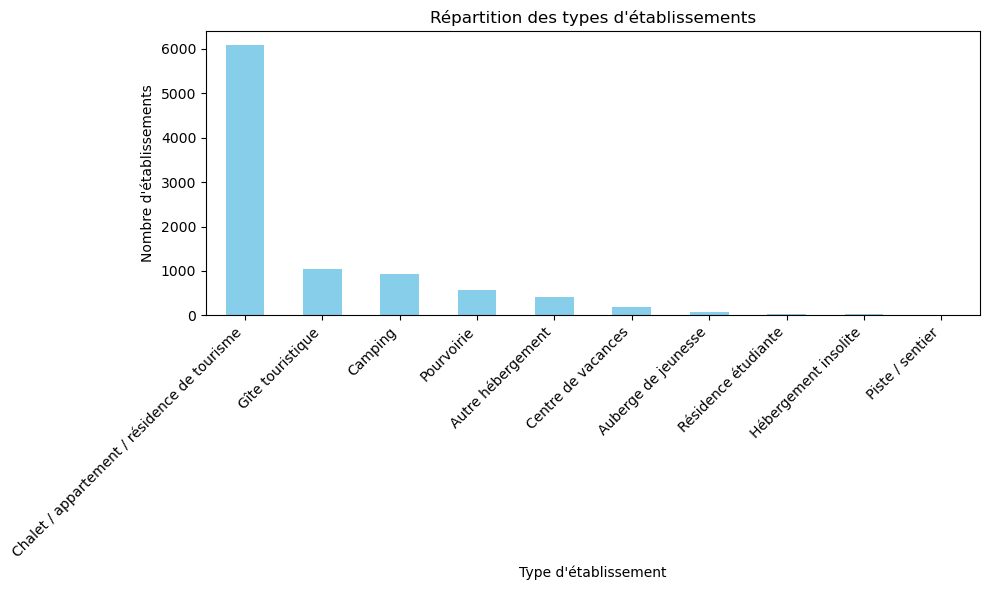

In [76]:

# Fusionnons les deux DataFrames sur la colonne 'ETBL_ID' pour obtenir une table avec les types d'établissements
# Cela permet d'associer les informations du type à chaque établissement
merged_df = pd.merge(etablissements_df, type_df, on='ETBL_ID')

# Compter le nombre d'établissements pour chaque type d'hébergement
# 'ETBL_TYPE_FR' correspond au type d'établissement en français
type_counts = merged_df['ETBL_TYPE_FR'].value_counts()

# Créer un graphique en barres pour visualiser la répartition des types d'établissements
plt.figure(figsize=(10,6))  # Définir la taille du graphique
type_counts.plot(kind='bar', color='skyblue')  # Utiliser un graphique à barres avec une couleur bleu clair
plt.title('Répartition des types d\'établissements')  # Titre du graphique
plt.xlabel('Type d\'établissement')  # Légende de l'axe X (types d'établissements)
plt.ylabel('Nombre d\'établissements')  # Légende de l'axe Y (nombre d'établissements)
plt.xticks(rotation=45, ha='right')  # Faire pivoter les étiquettes de l'axe X pour une meilleure lisibilité
plt.tight_layout()  # Ajuster la disposition pour éviter le chevauchement
plt.show()  # Afficher le graphique


### Explication : 
Dans cette première étape, nous avons commencé par fusionner les deux DataFrames etablissements_df et type_df sur la colonne clé ETBL_ID. Cette fusion nous permet d'ajouter des informations sur le type d'établissement pour chaque ligne de l'ensemble de données etablissements_df. Ensuite, nous avons utilisé la méthode value_counts() pour compter le nombre d'établissements dans chaque catégorie de type d'établissement.

### Réflexion :
Nous avons choisi cette approche pour comprendre la répartition des types d'établissements avant de poursuivre l'analyse. Cela nous permet de voir immédiatement quels types sont les plus fréquents et de cibler nos futures analyses et visualisations sur ces types. Nous avons opté pour un graphique en barres, qui est idéal pour visualiser la fréquence des différentes catégories.

### Constats :
On remarque que les "Chalets / appartements / résidences de tourisme" sont nettement plus nombreux que les autres types d'établissements, avec plus de 5000 établissements dans cette catégorie. Cela suggère qu'il y a une forte demande pour ce type d'hébergement, probablement en raison de son attrait pour les vacanciers qui recherchent des logements indépendants et spacieux, souvent dans des destinations touristiques populaires. Cette catégorie d'hébergement pourrait répondre à un large éventail de besoins, allant des familles aux groupes d'amis, et pourrait aussi être populaire en raison de son côté pratique, notamment pour des séjours prolongés ou en dehors des saisons de pointe.

### Prochaine étape : Analyse de la catégorie "Chalets / appartements / résidences de tourisme"

Filtrer les lignes où 'ETBL_TYPE_FR' est égal à 'Chalet / appartement / résidence de tourisme'

In [95]:
types_df_filtred = type_df[['ETBL_ID','ETBL_TYPE_FR']]


Supprimer les lignes contenant des valeurs NaN dans 'types_df_filtred'

In [99]:
types_df_filtred = types_df_filtred.dropna()

Fusionner types_df_filtred et adresses_df_filtered sur 'ETBL_ID'

In [101]:
types_df_with_municipalite = pd.merge(types_df_filtred, adresses_df_filtered, on='ETBL_ID', how='left')


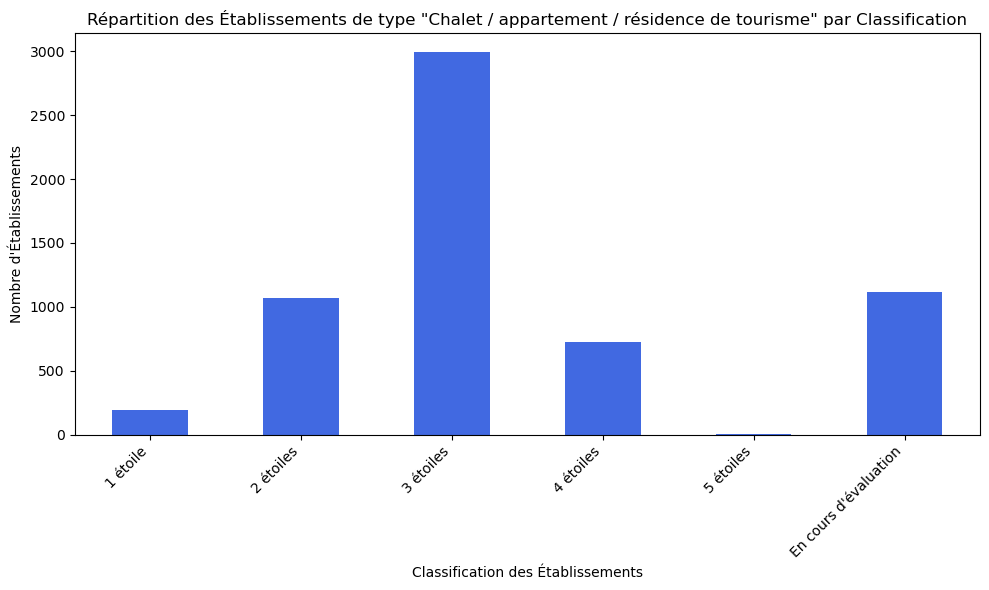

In [89]:
# Filtrer les caractéristiques pour obtenir uniquement celles liées à la "Classification"
classification_df = caracteristiques_df[caracteristiques_df['CARACT_NOM_FR'] == 'Classification']

# Effectuer la jointure entre types_df_with_municipalite et classification_df sur 'ETBL_ID'
types_df_with_municipalite_and_classification = pd.merge(
    types_df_with_municipalite, 
    classification_df[['ETBL_ID', 'CARACT_ATTRB_NOM_FR']], 
    on='ETBL_ID', 
    how='left'
)

# Renommer la colonne pour mieux refléter la classification
types_df_with_municipalite_and_classification.rename(columns={'CARACT_ATTRB_NOM_FR': 'Classification'}, inplace=True)

# Compter le nombre d'établissements par classification
classification_counts = types_df_with_municipalite_and_classification['Classification'].value_counts()

# Filtrer les établissements de type "Chalet / appartement / résidence de tourisme"
chalet_type_df = types_df_with_municipalite_and_classification[types_df_with_municipalite_and_classification['ETBL_TYPE_FR'] == 'Chalet / appartement / résidence de tourisme']


classification_moyenne = chalet_type_df.groupby('Classification')['ETBL_ID'].count()


plt.figure(figsize=(10, 6))
classification_moyenne.plot(kind='bar', color='royalblue')

# Ajouter des labels et un titre
plt.xlabel('Classification des Établissements')
plt.ylabel('Nombre d\'Établissements')
plt.title('Répartition des Établissements de type "Chalet / appartement / résidence de tourisme" par Classification')

# Afficher le graphique
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Constats : 
Les résultats montrent probablement que les établissements de 3 étoiles sont plus courants et accessibles pour un large public, tandis que ceux de 5 étoiles sont plus rares, peut-être en raison des exigences de cette classification et de son coût élevé.

# Visualisation de la répartition :

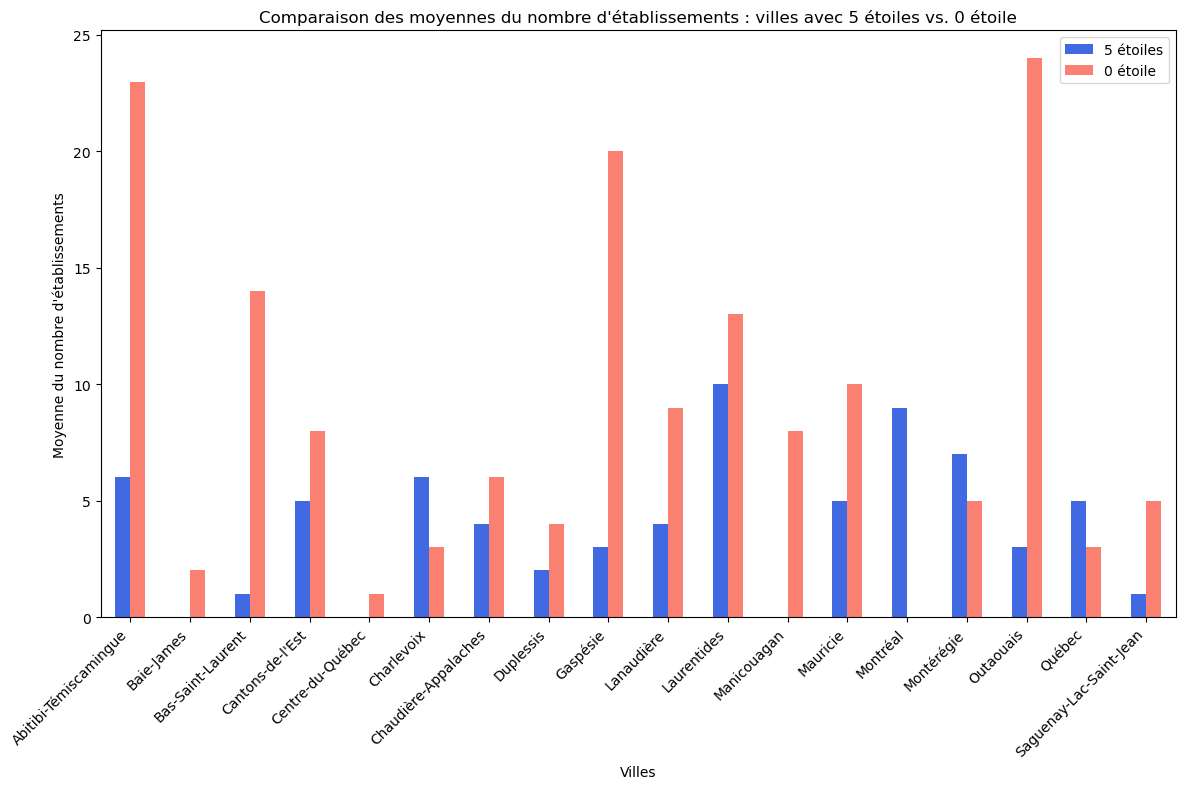

In [105]:
merged_df_4_reset = merged_df_4.reset_index()
# Filtrer les établissements ayant une classification de 5 étoiles et de 0 étoile
etablissements_5_etoiles = merged_df_4_reset[merged_df_4_reset['CARACT_ATTRB_NOM_FR'] == '5 étoiles']
etablissements_0_etoile = merged_df_4_reset[merged_df_4_reset['CARACT_ATTRB_NOM_FR'] == '0 étoile']

# Calculer la moyenne du nombre d'établissements pour chaque ville dans chaque groupe
moyenne_5_etoiles = etablissements_5_etoiles.groupby('TERR_ZONE_NOM_FR')['Nombre_ETBL_ID'].mean()
moyenne_0_etoile = etablissements_0_etoile.groupby('TERR_ZONE_NOM_FR')['Nombre_ETBL_ID'].mean()

# Créer un DataFrame pour comparer les moyennes
moyennes_comparaison = pd.DataFrame({
    '5 étoiles': moyenne_5_etoiles,
    '0 étoile': moyenne_0_etoile
}).fillna(0)

# Visualiser les moyennes avec un graphique en barres
moyennes_comparaison.plot(kind='bar', figsize=(12, 8), color=['royalblue', 'salmon'])
plt.xlabel("Villes")
plt.ylabel("Moyenne du nombre d'établissements")
plt.title("Comparaison des moyennes du nombre d'établissements : villes avec 5 étoiles vs. 0 étoile")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Constats :
En général, les établissements avec 0 étoile semblent plus nombreux que ceux avec 5 étoiles dans plusieurs villes, ce qui pourrait suggérer une tendance où de nombreux établissements n'atteignent pas une qualité de service élevée ou ne sont pas souvent évalués. Les établissements avec 5 étoiles sont moins fréquents, mais ils représentent tout de même une proportion plus faible comparée à ceux avec 0 étoile dans les villes étudiées. Cela met en évidence une concentration significative d'établissements qui n'ont pas été évalués ou qui ne répondent pas aux attentes des visiteurs.